In [1]:
#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
import wave
from playsound import playsound

In [2]:
#2
def DTFT(data,w,n, title=None):              # data is the numpy array of signal, w is frequency,n is the sequence scale.
    N = len(w) # Number of points for w.
    DTFT = np.zeros(N)+np.ones(N)*1j# Initializing DTFT
    for i in range(N):  # calculating DTFT
        dtft = 0
        for k in range(len(data)):
            dtft += data[k]*(np.cos(w[i]*k)+(np.sin(w[i]*k)*1j)) 
        DTFT[i]=dtft
        
    #MagnitudeSpectrum and Phase spectrum
    dtft_mag = [] #Magnitude Array
    dtft_phi = [] #Phase Array
    for i in range(N):#Calculating phase and magnitude
        dtft_mag+=[abs(DTFT[i])]#Magnitude = root(real^2 + img^2)
        dtft_phi+=[np.angle(DTFT[i],deg=True)]#Phase=arctan(img/real)
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    if title != None:                    #Setting title
        fig.suptitle(title, fontweight="bold")
    plt.rcParams['figure.figsize'] = [10, 8]
    #Real values Plot
    ax1.stem(w,dtft_mag,use_line_collection=True)
    ax1.set(xlabel='$\omega$', ylabel='$|X(e^{j\omega})|$')
    ax1.title.set_text('Magnitude Spectrum')
    
    #Phase Plot
    ax2.stem(w,dtft_phi,use_line_collection=True)
    ax2.set(xlabel='$\omega$', ylabel='$\Phi(X(e^{j\omega}))$')
    ax2.title.set_text('Phase Spectrum')
    ax2.yaxis.tick_right()
    return(DTFT)

def conv(x, h, n):
    
    x = np.hstack((np.zeros(np.sum(n < 0)), np.array(x)))          #adding zeros at beginning 
    h = np.flip(h)

    n  =  x.shape[0]
    m = h.shape[0]
    pads = np.zeros(m-1)
    x =  np.hstack((pads, x, pads))
    y = np.array([np.dot(x[i:i+m], h) for i in range(n+m-1)])    #summing all possible indexes
    return y

def Audio_conv(sound_file,sound_conv,h,n):
    sound = wave.open(sound_file,'r') # reading the sound file
    # Extract Raw Audio from Wav File
    signal = sound.readframes(-1)  #Reading the all the frames of audio signal into bytes
    s = np.frombuffer(signal,dtype=np.uint8) # converting bytes to nparray
    f_rate = sound.getframerate() # finding the framerate of the audio signal
    g = sound.getsampwidth()
    sound.close()
    soundnew = wave.open(sound_conv,'wb')      # opening new wave file                                # using the same file if duration of audio is less than 1 second
    Audio_conv = conv(s,h,n)
    data = Audio_conv.astype(np.uint8)         # converting array to int8 
    soundnew.setnchannels(1)                   # setting channels
    soundnew.setsampwidth(1)                   # setting sample width
    soundnew.setframerate(f_rate)              # setting frame rate
    soundnew.writeframesraw(data)              # writing data to frames
    soundnew.close()
    return (Audio_conv)

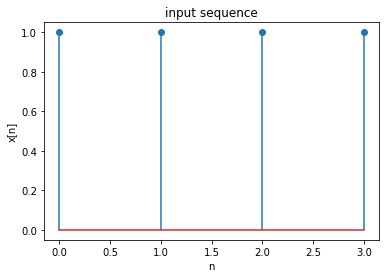

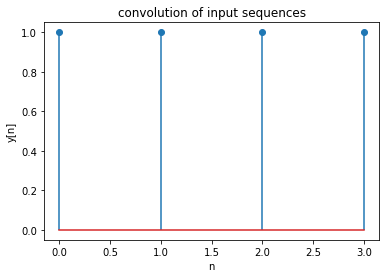

In [3]:
#1
x=[1,1,1,1]
h=[1]
y=conv(x,h,np.linspace(0,len(h)-1,num=len(h)))  #using convolve function

plt.rcParams['figure.figsize'] = [6, 4]
f1 = plt.figure()
plt.stem(x,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('input sequence')

f2 = plt.figure()
plt.stem(y,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('convolution of input sequences')
plt.show()

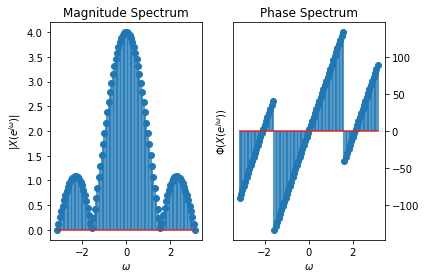

In [4]:
w_0 = np.linspace(-np.pi,np.pi,100) #frequency
x1=DTFT(x,w_0,np.linspace(0,len(x)-1,num=len(x)))

> Input sequence DTFT i.e. X($e^{jw}$) Both magnitude and phase spectrums

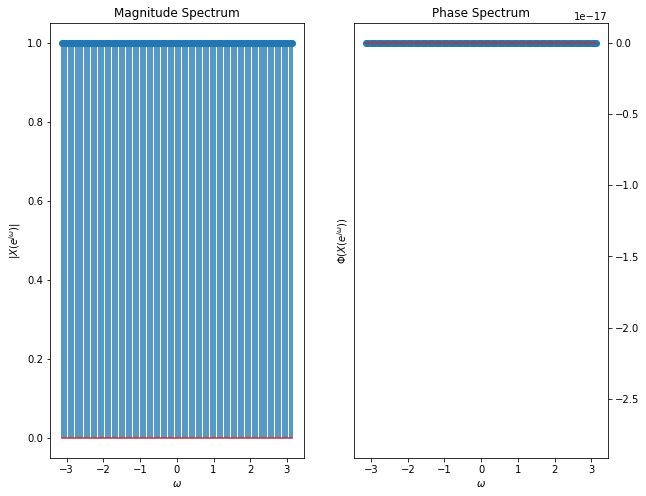

In [5]:
h1=DTFT(h,w_0,np.linspace(0,len(h)-1,num=len(h)))

> Another Input sequence DTFT i.e. H($e^{jw}$) Both magnitude and phase spectrums

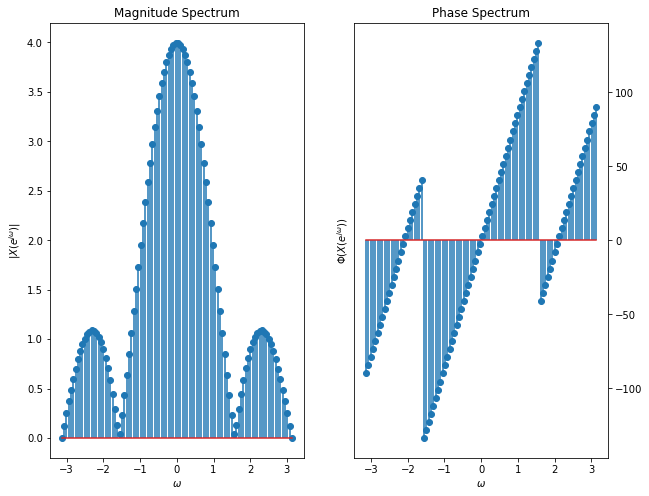

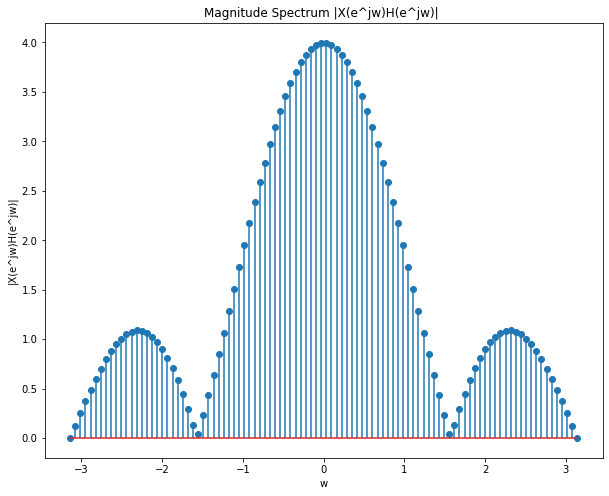

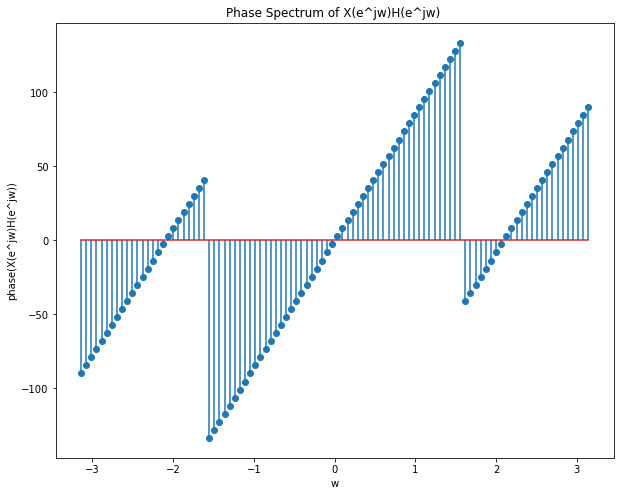

True


In [6]:
y1=DTFT(y,w_0,np.linspace(0,len(y)-1,num=len(y)))
y2=x1*h1
y2_mag = [] #Magnitude Array
y2_phi = [] #Phase Array
for i in range(len(y2)):#Calculating phase and magnitude
    y2_mag+=[abs(y2[i])]#Magnitude = root(real^2 + img^2)
    y2_phi+=[np.angle(y2[i],deg=True)]#Phase=arctan(img/real
f3 = plt.figure(3)
plt.stem(w_0,y2_mag,use_line_collection=True)
plt.xlabel('w')
plt.ylabel('|X(e^jw)H(e^jw)|')
plt.title('Magnitude Spectrum |X(e^jw)H(e^jw)| ')
    #Phase Plot
f4= plt.figure(4)
plt.stem(w_0,y2_phi,use_line_collection=True)
plt.xlabel('w')
plt.ylabel('phase(X(e^jw)H(e^jw))')
plt.title('Phase Spectrum of X(e^jw)H(e^jw) ')
plt.show()    
if (y1==y2).all():
    print("True")
else :
    print("False")

>First set of plots represents DTFT(Y)<br>
>Second set of plots represents X($e^{jw}$)H($e^{jw}$)

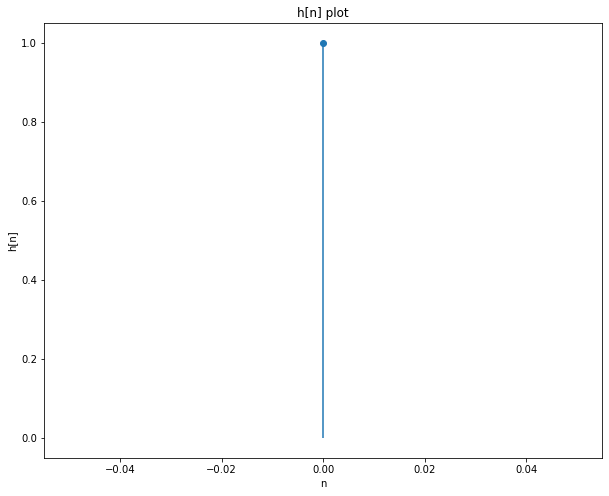

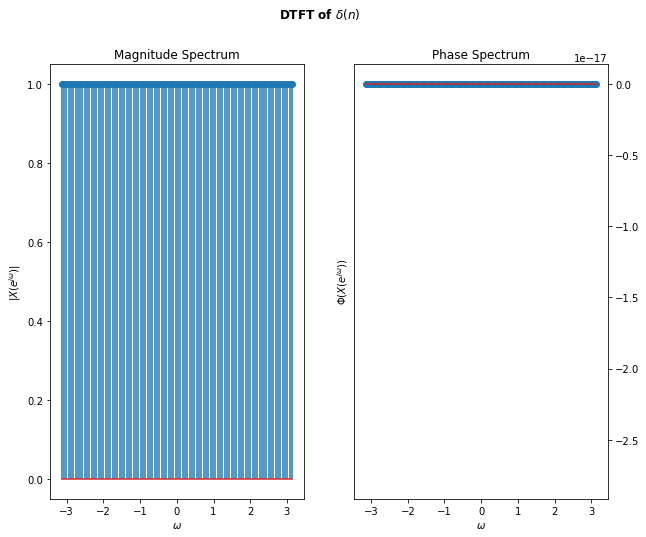

In [7]:
#2-a
h=[1]
f1 = plt.figure()
plt.stem(h,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('h[n] plot')
H=DTFT(h,w_0,np.linspace(0,len(h)-1,num=len(h)), title='DTFT of $\delta(n)$')



>h[n]=$\delta$[n]<br>
>H($e^{jw}$)

## OBSERVATIONS:-
> It has constant DTFT Magnitude of value 1.<br>
> And also phase is zero.<br>
> Using this system has no affect on the input i.e, Output =Input.

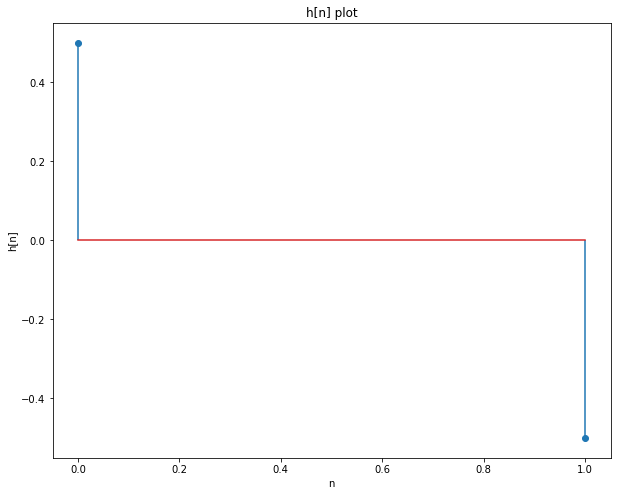

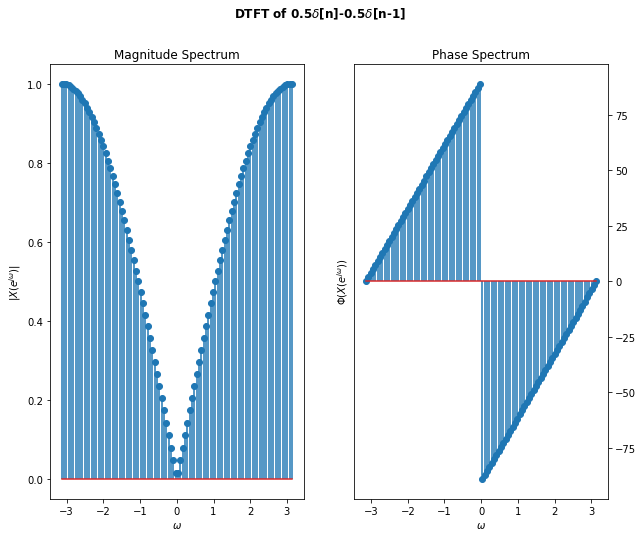

In [8]:
#2-b
h=[0.5,-0.5]
f1 = plt.figure(1)
plt.stem(h,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('h[n] plot')
H=DTFT(h,w_0,np.linspace(0,len(h)-1,num=len(h)), title='DTFT of 0.5$\delta$[n]-0.5$\delta$[n-1]')



>h[n]=0.5$\delta$[n]-0.5$\delta$[n-1]<br>
>H($e^{jw}$)

## OBSERVATIONS:-
> It has  DTFT Magnitude of value 1 at $\pi$ and -$\pi$ and around zero the magnitude is zero..<br>
> And phase is zero at $\pi$ and -$\pi$ and rest places it has linear behaviour..<br>
> Using this system for a given input in the output we can observe that low frequencies are,attentuated and frequencies around $\pi$ and -$\pi$ will be passed as it is also know as high pass filter.

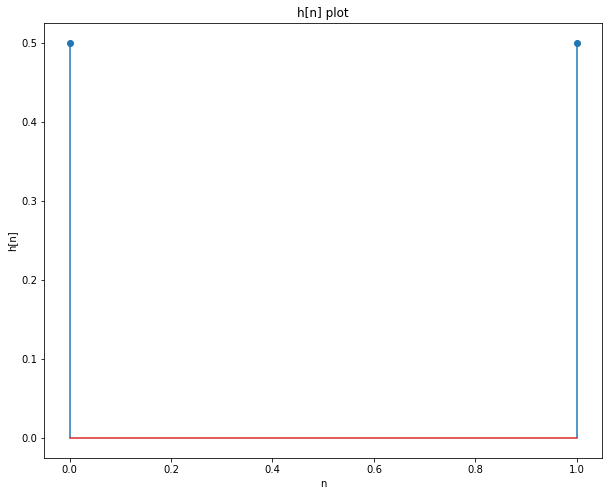

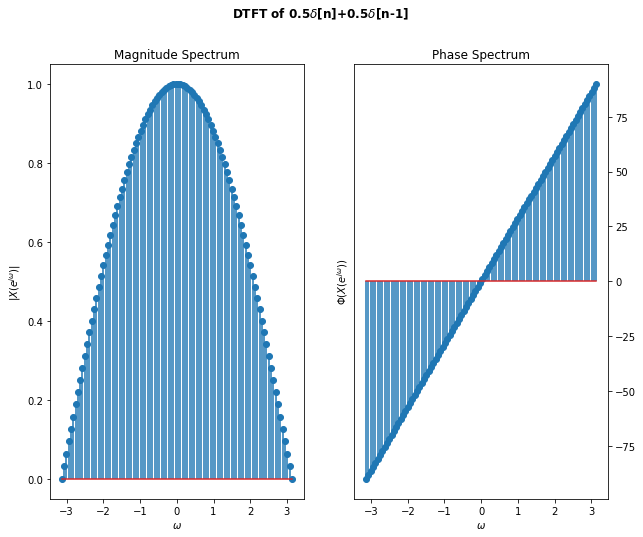

In [9]:
#2-c
h=[0.5,+0.5]
f1 = plt.figure(1)
plt.stem(h,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('h[n] plot')
H=DTFT(h,w_0,np.linspace(0,len(h)-1,num=len(h)), title='DTFT of 0.5$\delta$[n]+0.5$\delta$[n-1]')



>h[n]=0.5$\delta$[n]+0.5$\delta$[n-1]<br>
>H($e^{jw}$)

## OBSERVATIONS:-
> It has  DTFT Magnitude of value 1 at around zero and the magnitude is zero near $\pi$ and -$\pi$.<br>
> And phase is zero near 0 and rest places it has linear behaviour.<br>
> Using this system for a given input in the output we can observe that low frequencies are passed as it is and frequencies around $\pi$ and -$\pi$. will be attenuated also know as low pass filter.

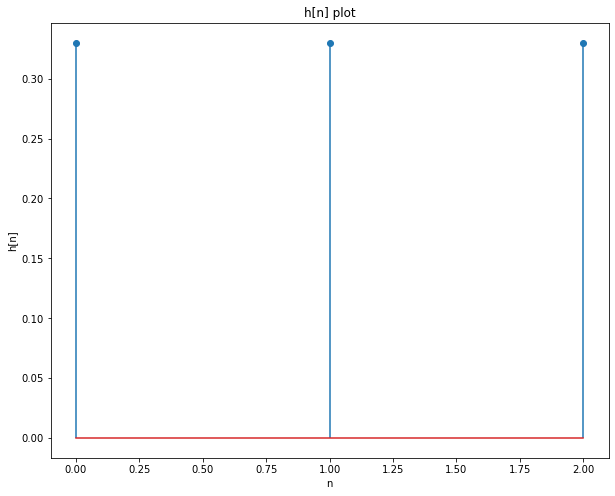

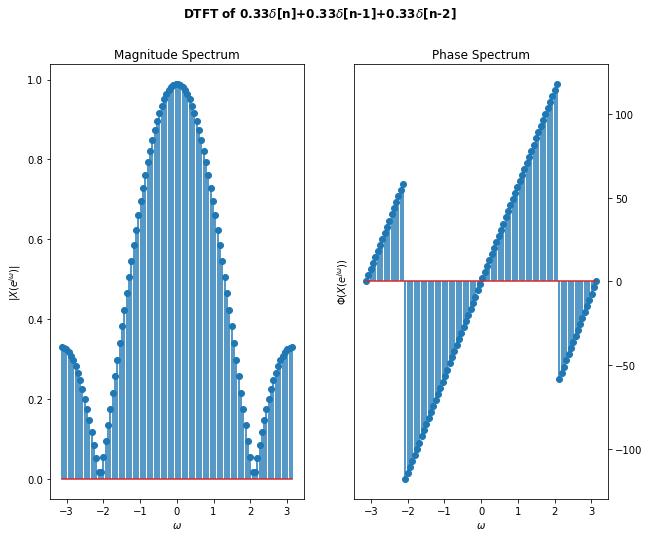

In [10]:
#2-d
h=[0.33,0.33,0.33]
f1 = plt.figure(1)
plt.stem(h,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('h[n] plot')
H=DTFT(h,w_0,np.linspace(0,len(h)-1,num=len(h)), title='DTFT of 0.33$\delta$[n]+0.33$\delta$[n-1]+0.33$\delta$[n-2]')



>h[n]=0.33$\delta$[n]+0.33$\delta$[n-1]+0.33$\delta$[n-2]<br>
>H($e^{jw}$)

## OBSERVATIONS:-
> Magnitude near 0 is 1 and at $\pi$ and -$\pi$ has significant magnitude and near -2 and 2 the magnitude is 0.<br>
> Phase is linearly incresing with omega but the plot looks piecewise beacause inverse tan has range of $\pi$ and -$\pi$ only.<br>
> This can be treated as Bandstop filter because it is stopping only certain frequencies.

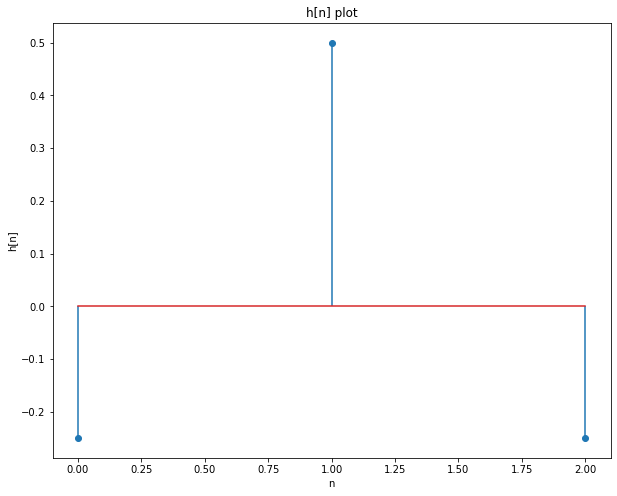

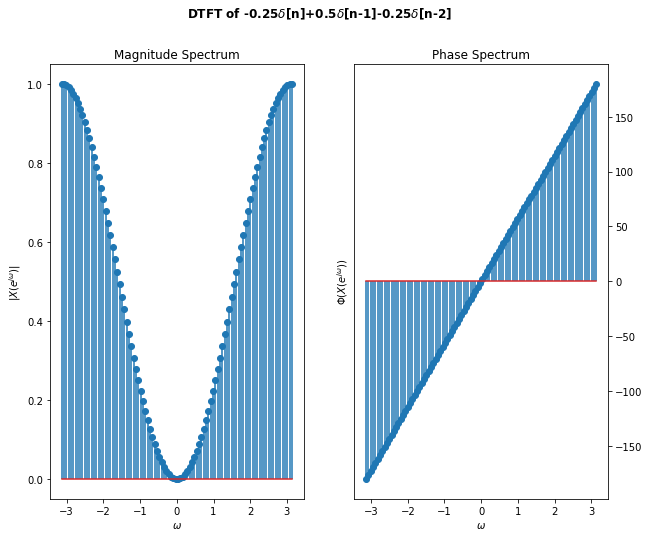

In [11]:
#2-e
h=[-0.25,0.5,-0.25]
f1 = plt.figure(1)
plt.stem(h,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('h[n] plot')
H=DTFT(h,w_0,np.linspace(0,len(h)-1,num=len(h)), title='DTFT of -0.25$\delta$[n]+0.5$\delta$[n-1]-0.25$\delta$[n-2]')



>h[n]=-0.25$\delta$[n]+0.5$\delta$[n-1]-0.25$\delta$[n-2]<br>
>H($e^{jw}$)

## OBSERVATIONS:-
> This impulse response exhibits same Magnitude and phase plot as of system(b).

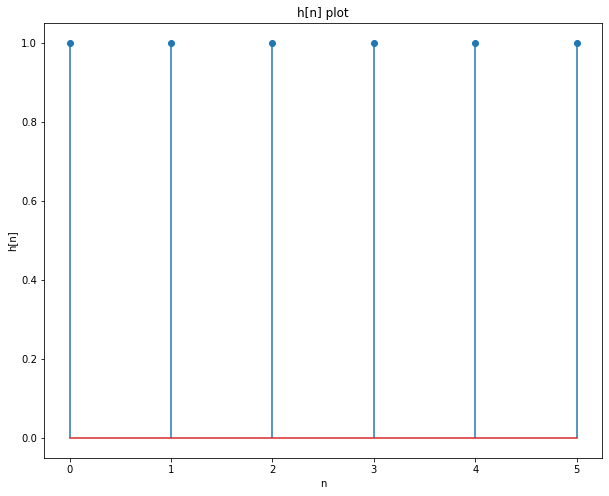

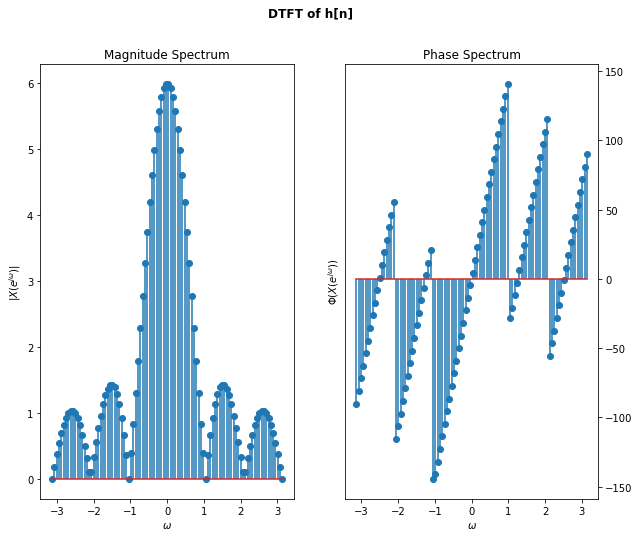

In [12]:
#2-f
h=np.zeros(6)
for i in range(int(6)):       #input iterating
    h[i]=1  
f1 = plt.figure(1)
plt.stem(h,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('h[n] plot')    
H=DTFT(h,w_0,np.linspace(0,len(h)-1,num=len(h)), title='DTFT of h[n]')



>h[n]=
    $\begin{cases}
      1&\text{;0 $\leq$ n $\leq$ 5}\\
      0&\text{otherwise}
    \end{cases}$<br>
>H($e^{jw}$)

## OBSERVATIONS:-
> There is this pattern observed in System(a) , System(c), System(d) and this System that is add more shifted versions of delta is just adding those litle peaks in Magnitude plot after that big one situated at 0.<br>
> But here the magnitude is more that one near 0.<br>
> The same goes for Phase plot too.

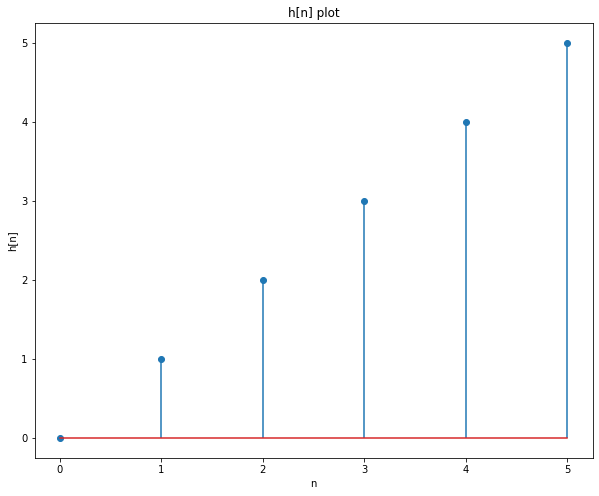

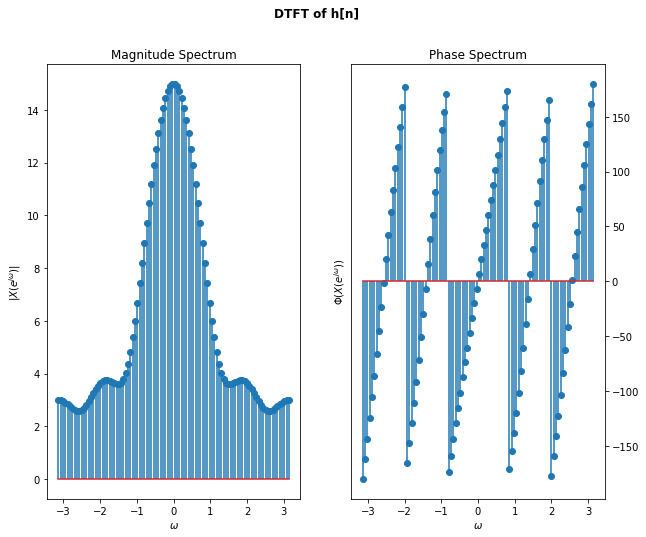

In [13]:
#2-g
h=np.zeros(6)
for i in range(int(6)):    #input iterating
    h[i]=i  
f1 = plt.figure(1)
plt.stem(h,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('h[n] plot')      
H=DTFT(h,w_0,np.linspace(0,len(h)-1,num=len(h)), title='DTFT of h[n]')



>h[n]=
    $\begin{cases}
      n&\text{;0 $\leq$ n $\leq$ 5}\\
      0&\text{otherwise}
    \end{cases}$<br>
>H($e^{jw}$)

## OBSERVATIONS:-
>Magnitude between -1 and 1 is very high and rest are almost less deviated.<br>
> Phase is picewise linear in between -$\pi$ and $\pi$.<br>
> So using this system will raise the low frequency components very high and rest with consistant gain.<br>

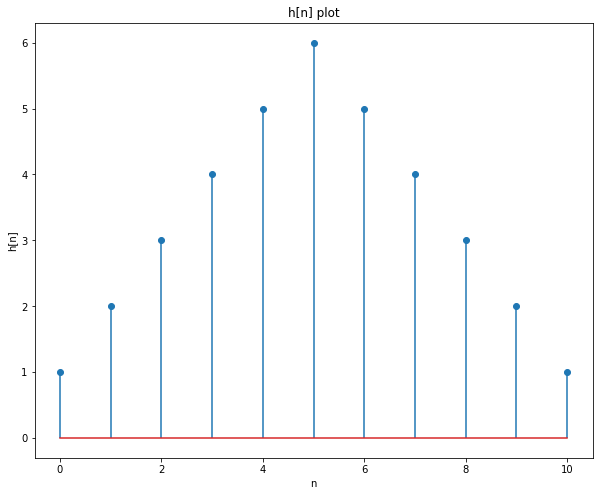

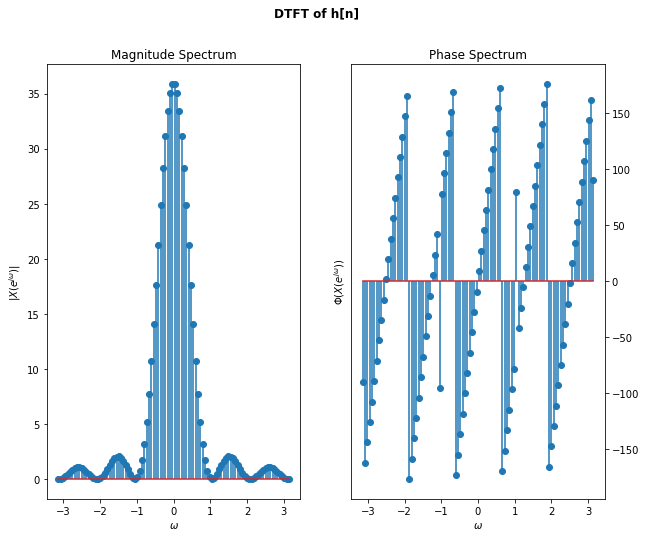

In [14]:
#2-h
h=np.zeros(11)
for i in range(int(11)):       #appling given input conditions
    if i <= 5:
        h[i]=i+1
    else:
        h[i]=11-i
f1 = plt.figure(1)
plt.stem(h,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('h[n] plot')
H=DTFT(h,w_0,np.linspace(0,len(h)-1,num=len(h)), title='DTFT of h[n]')



>h[n]=
    $\begin{cases}
      n+1&\text{;0 $\leq$ n $\leq$ 5}\\
      11-n&\text{;6 $\leq$ n $\leq$ 10}\\  
      0&\text{otherwise}
    \end{cases}$<br>
>H($e^{jw}$)

## OBSERVATIONS:-
> Magnitude between -1 and 1 is very high and rest are almost less deviated.<br>
> There exists few frequency points where the magnitude is completely zero.<br>
> And in the rest frequency points the signal is just has some gain.<br>
> Phase is picewise linear in between -$\pi$ and $\pi$.<br>
> So using this system will raise the low frequency components very high, does not allow few points and rest with some gain


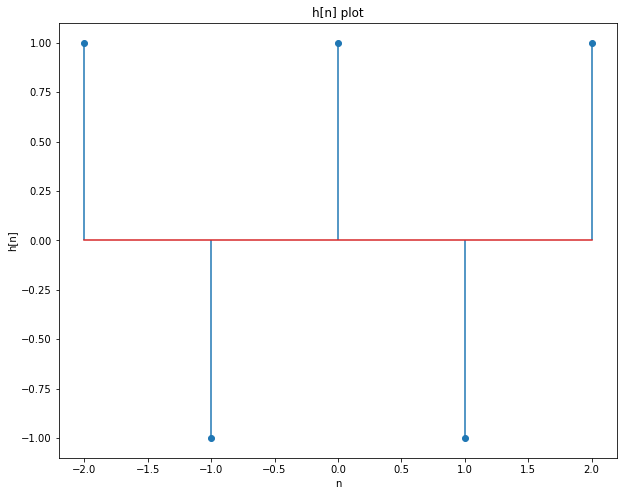

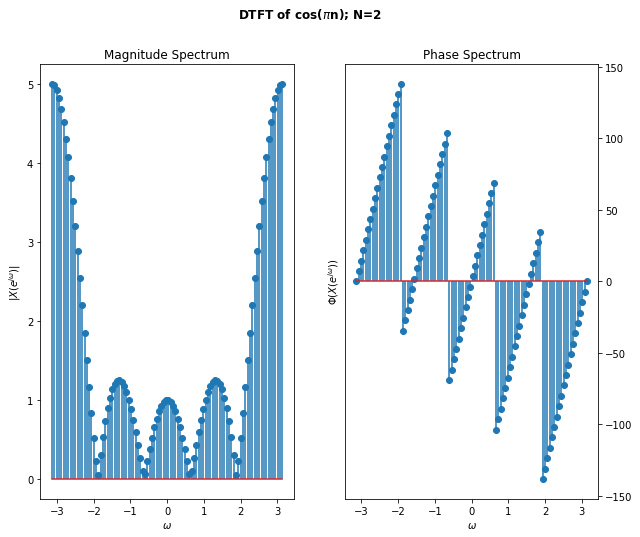

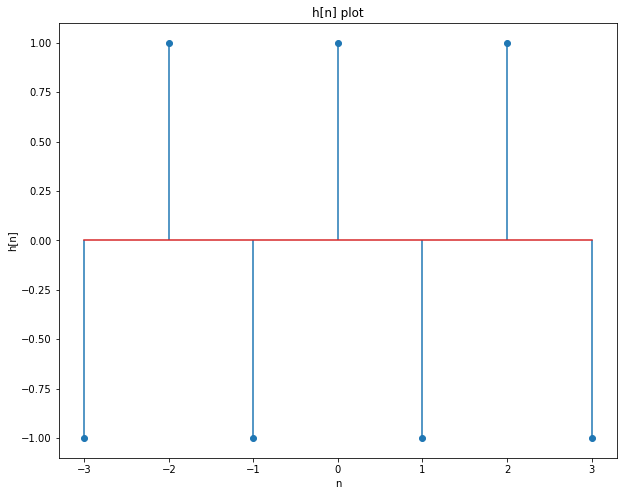

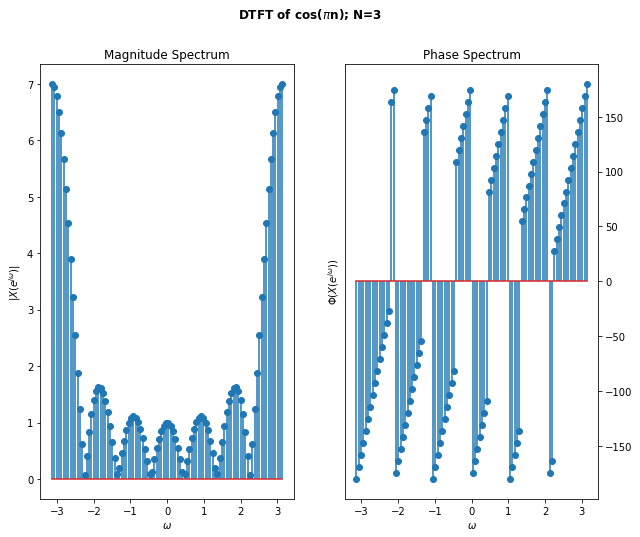

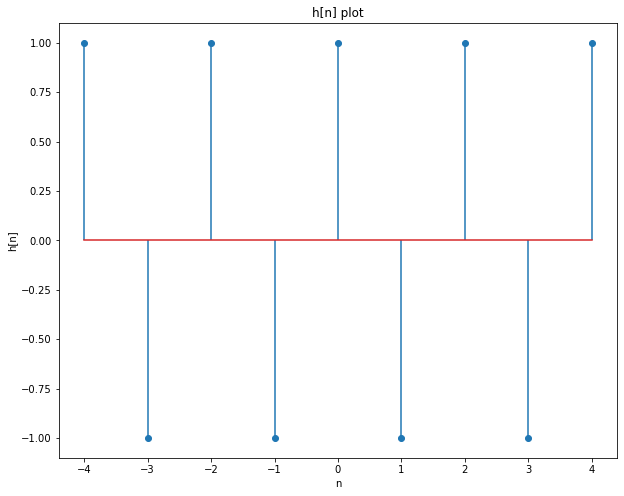

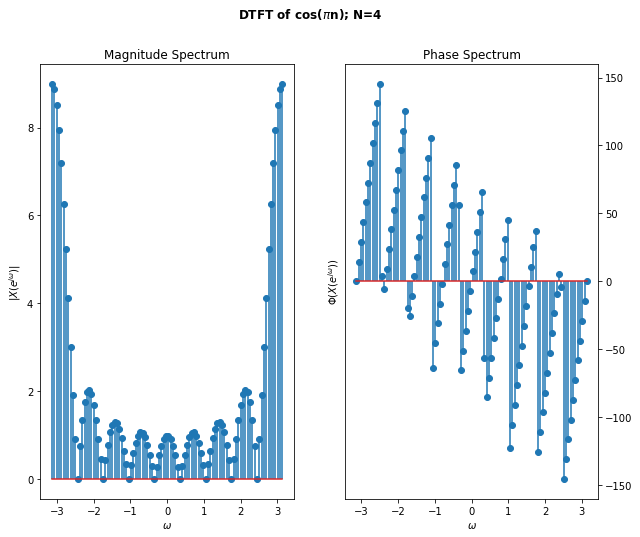

In [15]:
#2-i
N=2                                             #parameter
n1=np.linspace(-N,N,num=(2*N)+1)                 #taking negative indexes into account
h=np.cos(np.pi*n1)                               #input
f1 = plt.figure()
plt.stem(n1,h,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('h[n] plot')
H=DTFT(h,w_0,n1, title='DTFT of cos($\pi$n); N='+str(N))

N=3                                           #new parameter
n1=np.linspace(-N,N,num=(2*N)+1)
h=np.cos(np.pi*n1)  
f2 = plt.figure()
plt.stem(n1,h,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('h[n] plot')
H=DTFT(h,w_0,n1, title='DTFT of cos($\pi$n); N='+str(N))

N=4                                           #another parameter
n1=np.linspace(-N,N,num=(2*N)+1)
h=np.cos(np.pi*n1)  
f3 = plt.figure()
plt.stem(n1,h,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('h[n] plot')
H=DTFT(h,w_0,n1, title='DTFT of cos($\pi$n); N='+str(N))



>h[n]=cos($\pi$n);-N$\leq$n$\leq$N<br>
>H($e^{jw}$)

## OBSERVATIONS:-
> The DTFT for all N is Real, this can observed by Phase plot.<br>
> For all N, -$\pi$ and $\pi$. frequency components are having higher Magnitudes.<br>
> With increase in N we can observe more little peaks in between -$\pi$ and $\pi$.<br>

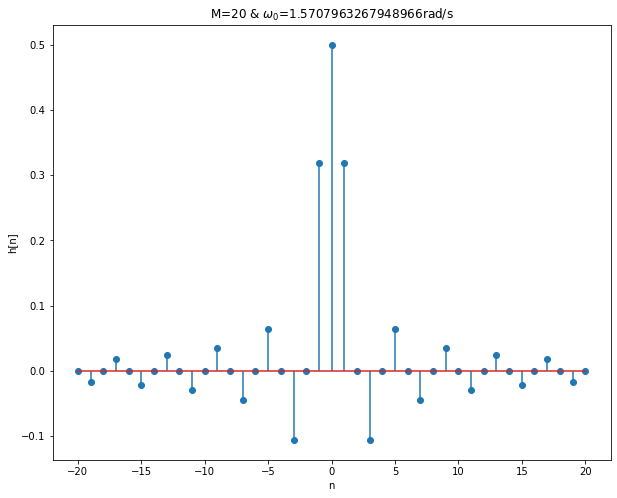

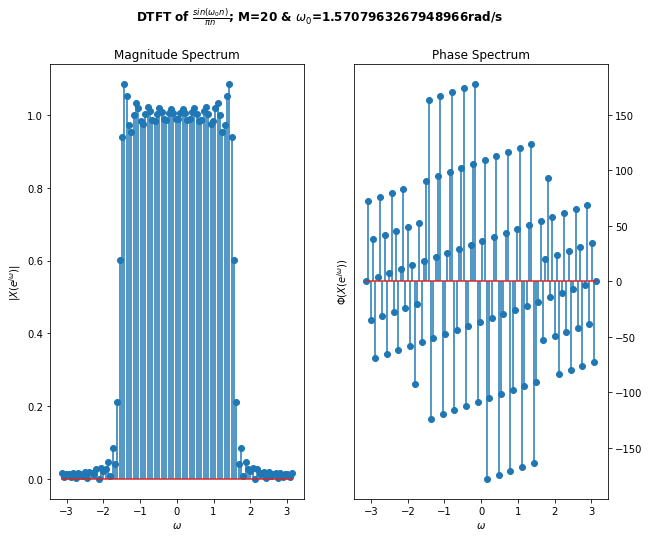

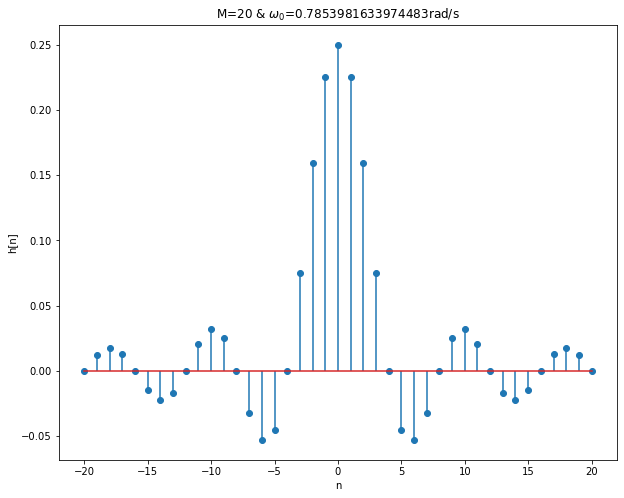

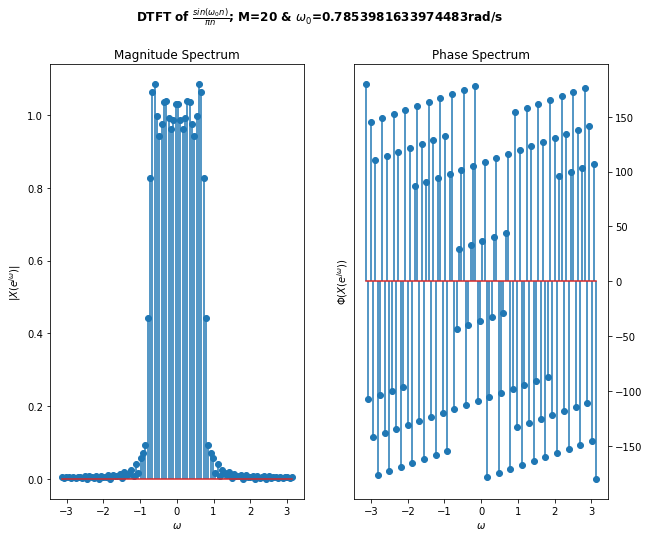

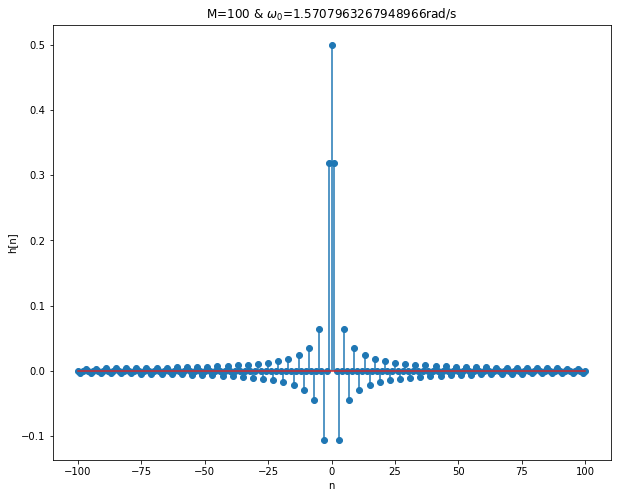

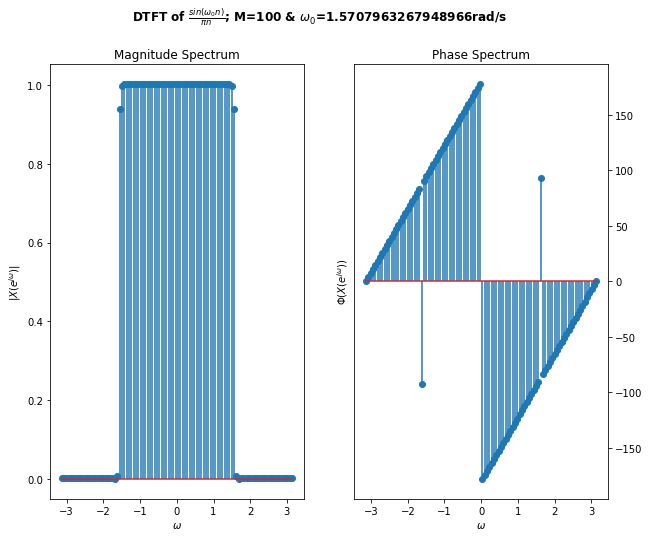

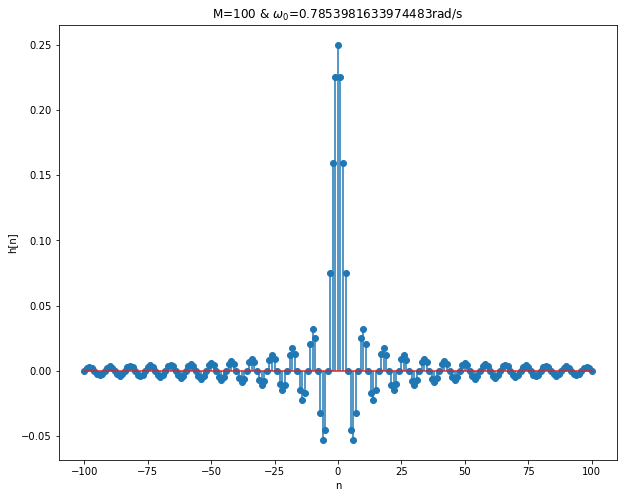

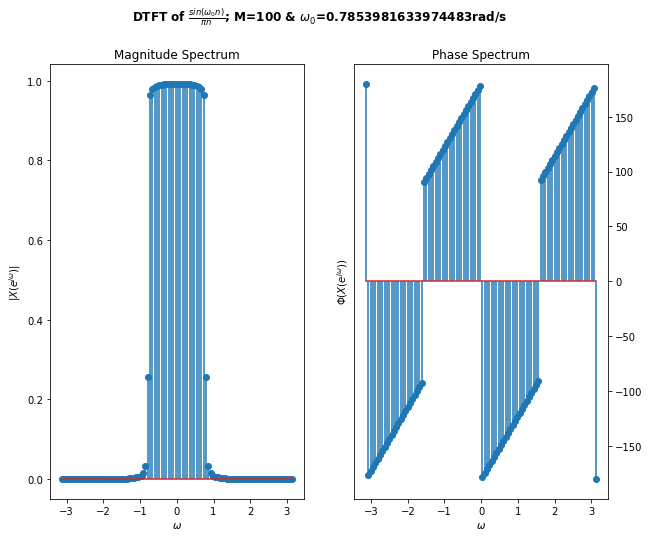

In [16]:
#2-j
M=20
w0=np.pi/2
n2=np.linspace(-1*M,M,num=(2*M)+1)
h = w0*np.sinc(w0*n2/np.pi)/np.pi


plt.figure()
plt.stem(n2,h,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('M='+str(M)+' & ${\omega}_0$='+str(w0)+'rad/s')

H=DTFT(h,w_0,n2, title='DTFT of $\\frac{sin({\omega}_0n)}{\pi n}$; M='+str(M)+' & ${\omega}_0$='+str(w0)+'rad/s')

M=20
w0=np.pi/4
n2=np.linspace(-1*M,M,num=(2*M)+1)
h = w0*np.sinc(w0*n2/np.pi)/np.pi  
        
plt.figure()
plt.stem(n2,h,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('M='+str(M)+' & ${\omega}_0$='+str(w0)+'rad/s')

H=DTFT(h,w_0,n2, title='DTFT of $\\frac{sin({\omega}_0n)}{\pi n}$; M='+str(M)+' & ${\omega}_0$='+str(w0)+'rad/s')

M=100
w0=np.pi/2
n2=np.linspace(-1*M,M,num=(2*M)+1)
h = w0*np.sinc(w0*n2/np.pi)/np.pi

plt.figure()
plt.stem(n2,h,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('M='+str(M)+' & ${\omega}_0$='+str(w0)+'rad/s')

H=DTFT(h,w_0,n2, title='DTFT of $\\frac{sin({\omega}_0n)}{\pi n}$; M='+str(M)+' & ${\omega}_0$='+str(w0)+'rad/s')

M=100
w0=np.pi/4
n2=np.linspace(-1*M,M,num=(2*M)+1)
h = w0*np.sinc(w0*n2/np.pi)/np.pi
        
plt.figure()
plt.stem(n2,h,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('M='+str(M)+' & ${\omega}_0$='+str(w0)+'rad/s')

H=DTFT(h,w_0,n2, title='DTFT of $\\frac{sin({\omega}_0n)}{\pi n}$; M='+str(M)+' & ${\omega}_0$='+str(w0)+'rad/s')



## OBERVATIONS:- 
> The DTFT for any M or w0 is complex this can oberved in Phase plot.<br>
> w0 is deciding the bandwidth of the Rectangle wave in Magnitude plot.<br>
> Incresing M makes the curve sharper beacause taking more values in time values makes it real sinc.<br>
> This is a Bandpass filter.

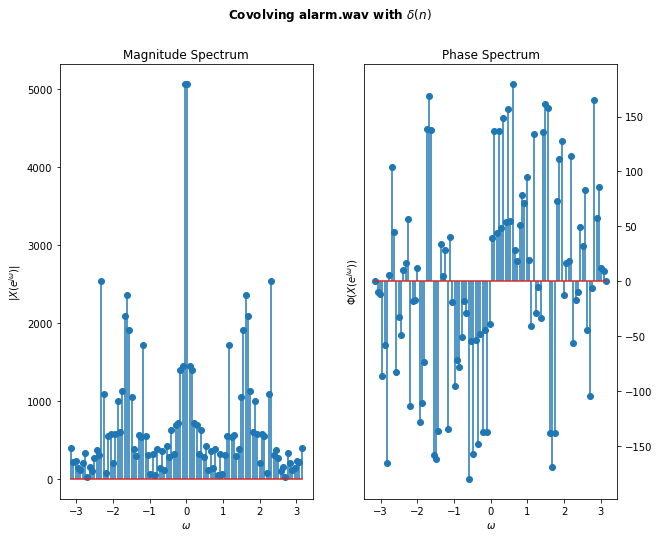

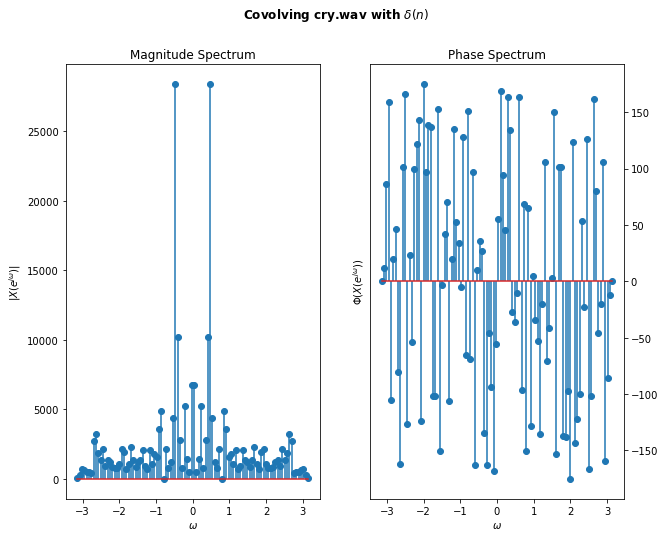

In [17]:
#3-for alarm and cry
#3-a
h=[1]
S=Audio_conv('alarm.wav','alarma.wav',h,np.linspace(0,len(h)-1,num=len(h)))         #applying convolution and creating new wav file 
playsound('alarma.wav')
H=DTFT(S,w_0,np.linspace(0,len(S)-1,num=len(S)), title='Covolving alarm.wav with $\delta(n)$')                       #DTFT of new data
S1=Audio_conv('cry.wav','crya.wav',h,np.linspace(0,len(h)-1,num=len(h)))
playsound('crya.wav')
H=DTFT(S1,w_0,np.linspace(0,len(S1)-1,num=len(S1)), title='Covolving cry.wav with $\delta(n)$')



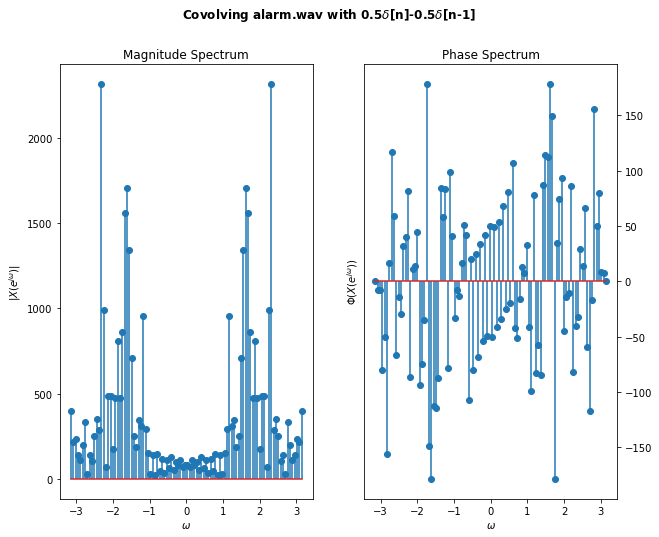

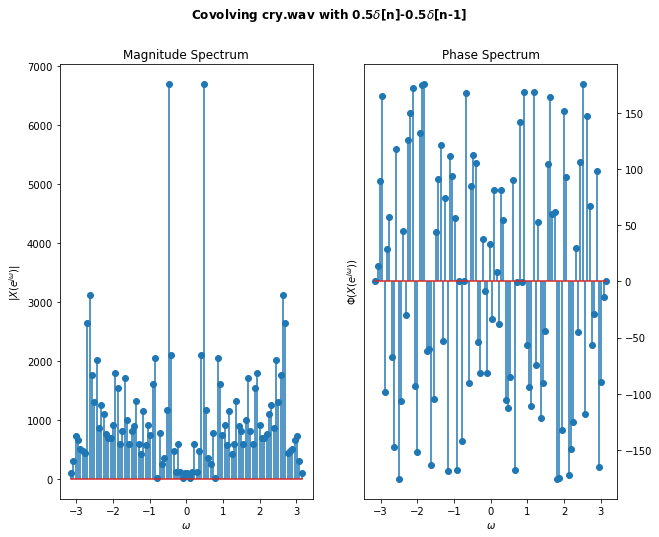

In [18]:
#2-b
h=[0.5,-0.5]
S=Audio_conv('alarm.wav','alarmb.wav',h,np.linspace(0,len(h)-1,num=len(h))) #applying convolution and creating new wav file 
playsound('alarmb.wav')
H=DTFT(S,w_0,np.linspace(0,len(S)-1,num=len(S)), title='Covolving alarm.wav with 0.5$\delta$[n]-0.5$\delta$[n-1]')                       #DTFT of new data
S1=Audio_conv('cry.wav','cryb.wav',h,np.linspace(0,len(h)-1,num=len(h)))
playsound('cryb.wav')
H=DTFT(S1,w_0,np.linspace(0,len(S1)-1,num=len(S1)), title='Covolving cry.wav with 0.5$\delta$[n]-0.5$\delta$[n-1]')



## OBSERVATIONS:-
> As previously observed that DTFT of this used impulse response acts like High pass filter thus allowing only high frequency components.<br>
> In both case we can observe that they have very high pitch sounds.<br>
> In the graph we see that low frequency components are attenuated.

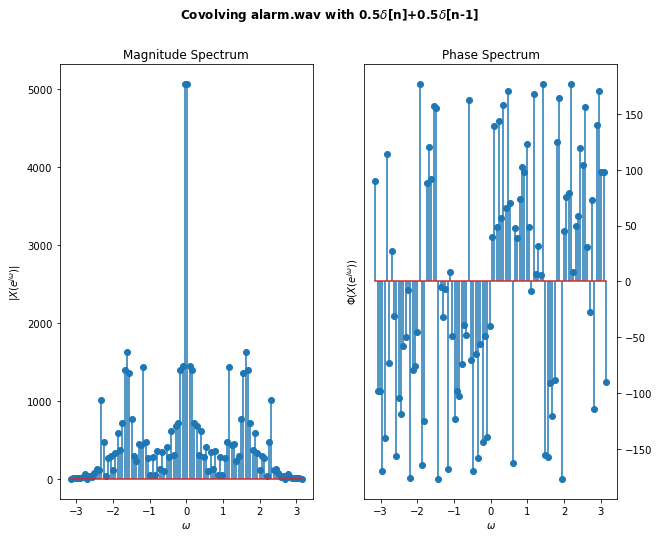

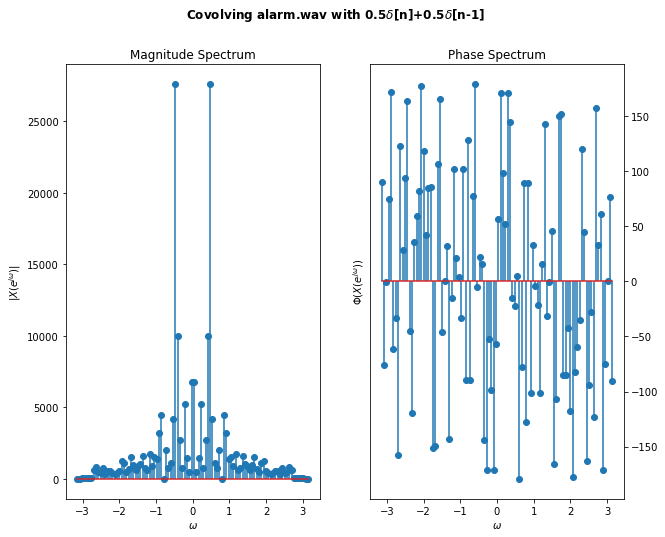

In [19]:
#2-c
h=[0.5,+0.5]
S=Audio_conv('alarm.wav','alarmc.wav',h,np.linspace(0,len(h)-1,num=len(h)))#applying convolution and creating new wav file 
playsound('alarmc.wav')
H=DTFT(S,w_0,np.linspace(0,len(S)-1,num=len(S)), title='Covolving alarm.wav with 0.5$\delta$[n]+0.5$\delta$[n-1]')                                   #DTFT of new data
S1=Audio_conv('cry.wav','cryc.wav',h,np.linspace(0,len(h)-1,num=len(h)))
playsound('cryc.wav')
H=DTFT(S1,w_0,np.linspace(0,len(S1)-1,num=len(S1)), title='Covolving alarm.wav with 0.5$\delta$[n]+0.5$\delta$[n-1]')



## OBSERVATIONS:-
> As previously observed that DTFT of this used impulse response acts like low pass filter thus allowing only low frequency components.<br>
> In both case we can observe that they have very low pitch sounds.<br>
> In the graph we see that high frequency components are attenuated.


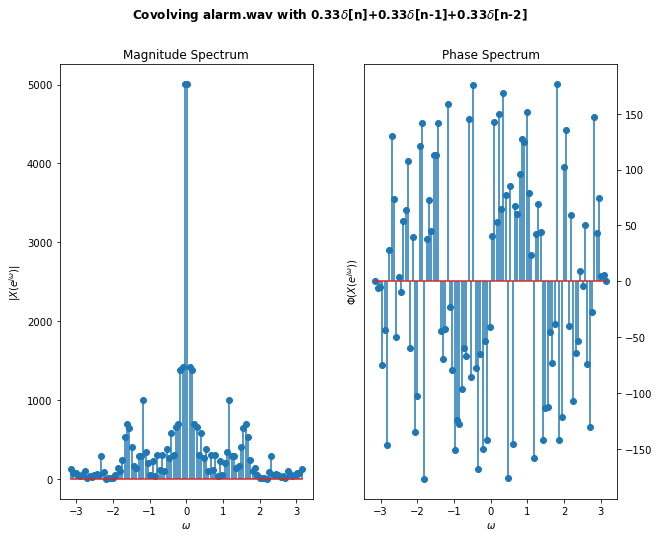

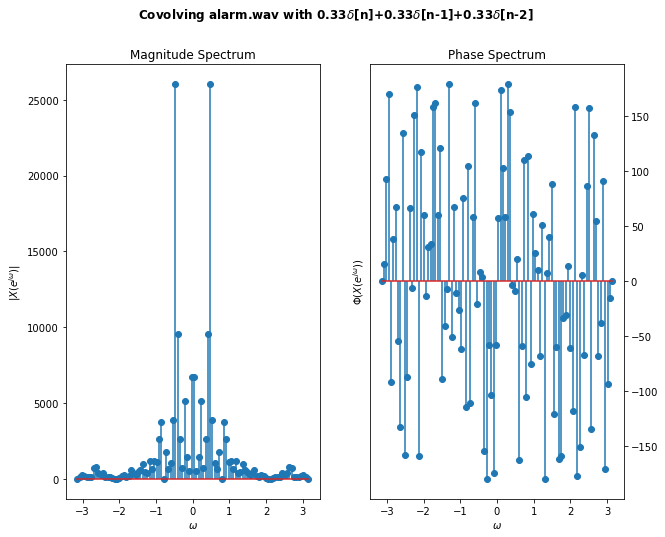

In [20]:
#2-d
h=[0.33,0.33,0.33]
S=Audio_conv('alarm.wav','alarmd.wav',h,np.linspace(0,len(h)-1,num=len(h)))#applying convolution and creating new wav file 
playsound('alarmd.wav')
H=DTFT(S,w_0,np.linspace(0,len(S)-1,num=len(S)), title='Covolving alarm.wav with 0.33$\delta$[n]+0.33$\delta$[n-1]+0.33$\delta$[n-2]')                               #DTFT of new data
S1=Audio_conv('cry.wav','cryd.wav',h,np.linspace(0,len(h)-1,num=len(h)))
playsound('cryd.wav')
H=DTFT(S1,w_0,np.linspace(0,len(S1)-1,num=len(S1)), title='Covolving alarm.wav with 0.33$\delta$[n]+0.33$\delta$[n-1]+0.33$\delta$[n-2]')



## OBSERVATIONS:-
> As previously observed that DTFT of this used impulse response this allows low frequencies with any attenuation and high freqencies with little attentuation and rest ate attenuated.<br>
> In both case we can observe that they have very low pitch sounds and slighly high ones too.<br>
> In the graph we see that middle frequency components are attenuated.

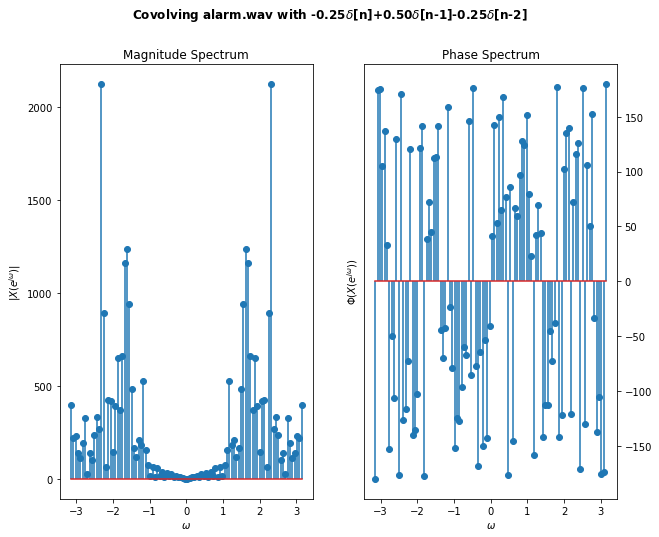

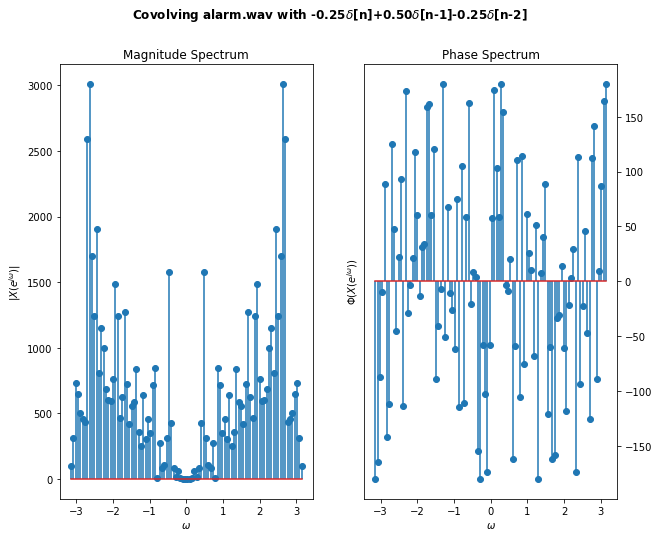

In [21]:
#2-e
h=[-0.25,0.5,-0.25]
S=Audio_conv('alarm.wav','alarme.wav',h,np.linspace(0,len(h)-1,num=len(h)))#applying convolution and creating new wav file 
playsound('alarmd.wav')
H=DTFT(S,w_0,np.linspace(0,len(S)-1,num=len(S)), title='Covolving alarm.wav with -0.25$\delta$[n]+0.50$\delta$[n-1]-0.25$\delta$[n-2]')                               #DTFT of new data
S1=Audio_conv('cry.wav','crye.wav',h,np.linspace(0,len(h)-1,num=len(h)))
playsound('cryd.wav')
H=DTFT(S1,w_0,np.linspace(0,len(S1)-1,num=len(S1)), title='Covolving alarm.wav with -0.25$\delta$[n]+0.50$\delta$[n-1]-0.25$\delta$[n-2]')



## OBSERVATIONS:-
> As previously observed that DTFT of this used impulse response acts like High pass filter thus allowing only high frequency components.<br>
> In both case we can observe that they have very high pitch/frequency sounds.<br>
> In the graph we see that low frequency components are attenuated.<br>

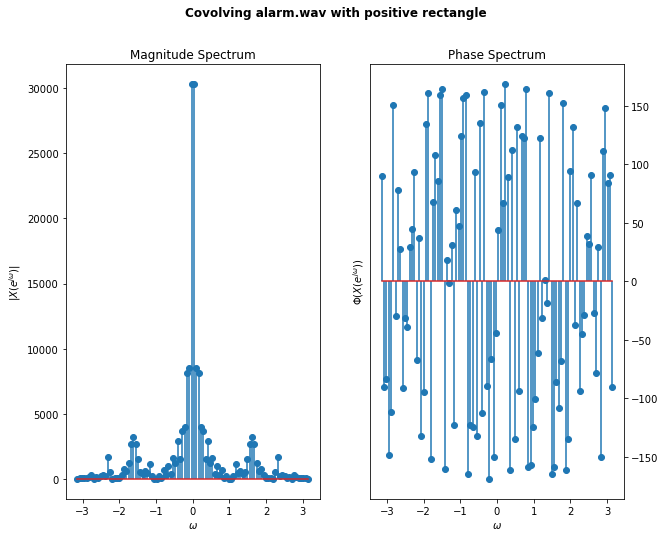

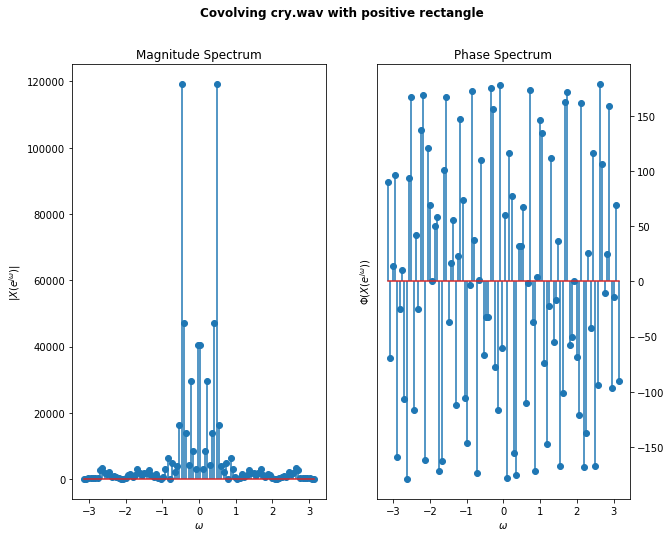

In [22]:
#2-f
h=np.zeros(6)
for i in range(int(6)):
    h[i]=1 
S=Audio_conv('alarm.wav','alarmf.wav',h,np.linspace(0,len(h)-1,num=len(h)))#applying convolution and creating new wav file 
playsound('alarmf.wav')
H=DTFT(S,w_0,np.linspace(0,len(S)-1,num=len(S)), title='Covolving alarm.wav with positive rectangle')                                     #DTFT of new data
S1=Audio_conv('cry.wav','cryf.wav',h,np.linspace(0,len(h)-1,num=len(h)))
playsound('cryf.wav')
H=DTFT(S1,w_0,np.linspace(0,len(S1)-1,num=len(S1)), title='Covolving cry.wav with positive rectangle')



## OBSERVATIONS:-
> As previously observed that DTFT of this used impulse response has very high gain for low frequency components and rest has very low gain.<br>
> In both case we can observe that they have very low frequency sounds with high pitch and high frerquencies have very low pitch.

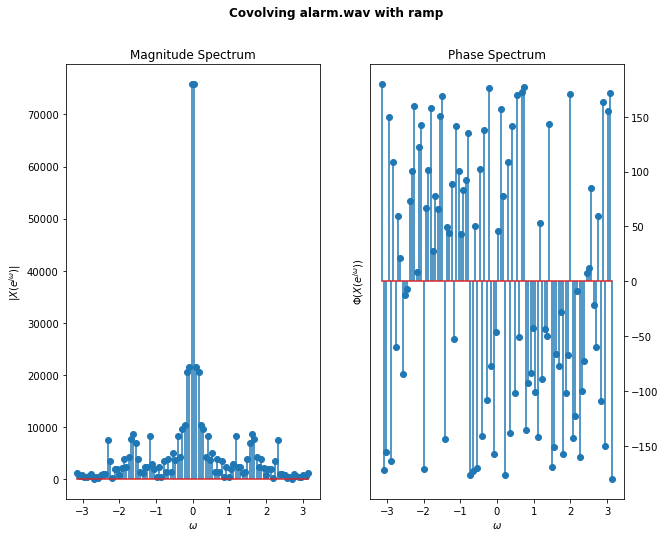

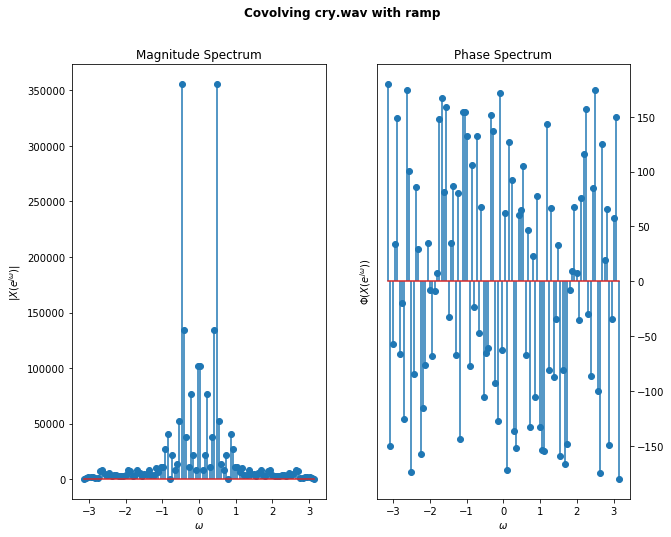

In [23]:
#2-g
h=np.zeros(6)
for i in range(int(6)):
    h[i]=i
S=Audio_conv('alarm.wav','alarmg.wav',h,np.linspace(0,len(h)-1,num=len(h)))#applying convolution and creating new wav file 
playsound('alarmg.wav')
H=DTFT(S,w_0,np.linspace(0,len(S)-1,num=len(S)), title='Covolving alarm.wav with ramp')                                     #DTFT of new data
S1=Audio_conv('cry.wav','cryf.wav',h,np.linspace(0,len(h)-1,num=len(h)))
playsound('cryf.wav')
H=DTFT(S1,w_0,np.linspace(0,len(S1)-1,num=len(S1)), title='Covolving cry.wav with ramp')



## OBSERVATIONS:-
> As previously observed that DTFT of this used impulse response has very high gain for low frequency components and rest has some gain above 1.<br>
> In both case we can observe that they have very low frequency sounds with high pitch.

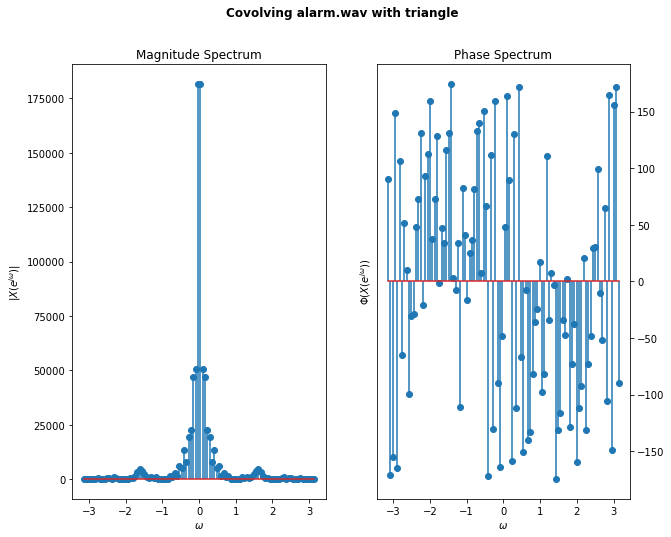

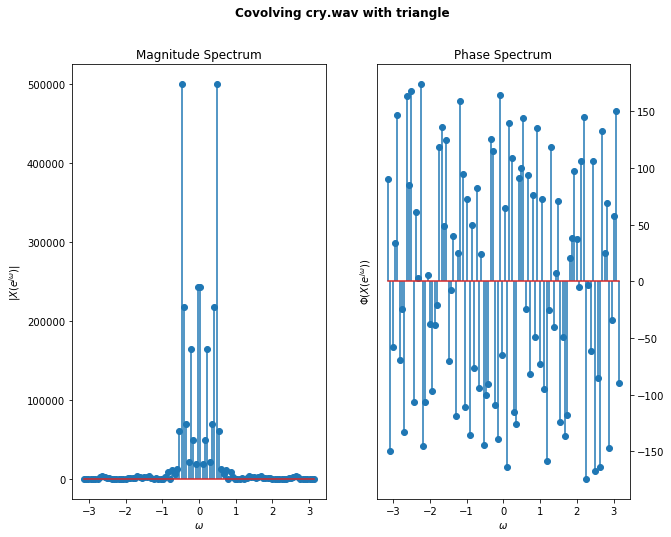

In [24]:
#2-h
h=np.zeros(11)
for i in range(int(11)):
    if i <= 5:
        h[i]=i+1
    else:
        h[i]=11-i 
S=Audio_conv('alarm.wav','alarmh.wav',h,np.linspace(0,len(h)-1,num=len(h)))#applying convolution and creating new wav file 
H=DTFT(S,w_0,np.linspace(0,len(S)-1,num=len(S)), title='Covolving alarm.wav with triangle')                                     #DTFT of new data
S1=Audio_conv('cry.wav','cryh.wav',h,np.linspace(0,len(h)-1,num=len(h)))
playsound('cryh.wav')
H=DTFT(S1,w_0,np.linspace(0,len(S1)-1,num=len(S1)), title='Covolving cry.wav with triangle')


## OBSERVATIONS:-
> As previously observed that DTFT of this used impulse response has very high gain for low frequency components and rest has very low gain.<br>
> In both case we can observe that they have very low frequency sounds with high pitch and high frerquencies have very low pitch.

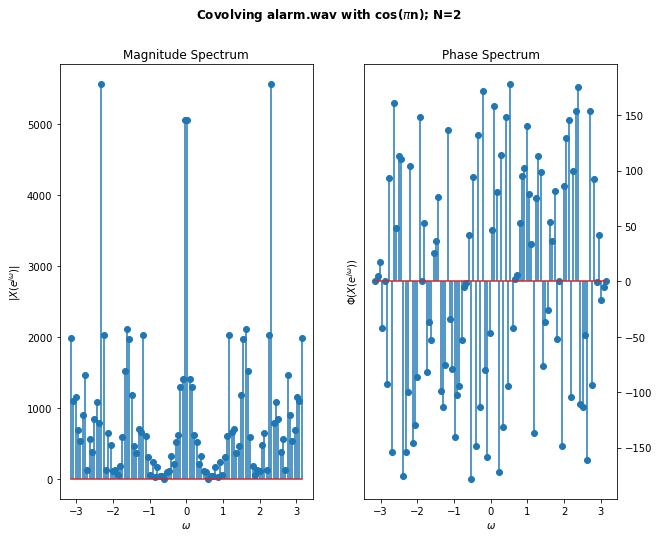

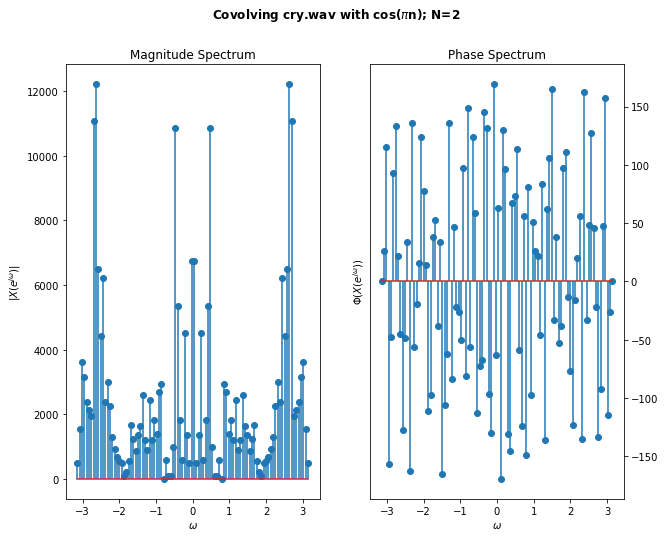

In [25]:
#2-i
N=2
n1=np.linspace(-N,N,num=(2*N)+1)
h=np.cos(np.pi*n1)   
S=Audio_conv('alarm.wav','alarmi1.wav',h,n1) #applying convolution and creating new wav file
playsound('alarmi1.wav')
H=DTFT(S,w_0,np.linspace(-2*N,len(S)-(2*N)-1,num=len(S)), title='Covolving alarm.wav with cos($\pi$n); N=2')   #DTFT of new data
S=Audio_conv('cry.wav','cryi1.wav',h,n1)
playsound('cryi1.wav')                                        
H=DTFT(S,w_0,np.linspace(-2*N,len(S)-(2*N)-1,num=len(S)), title='Covolving cry.wav with cos($\pi$n); N=2')

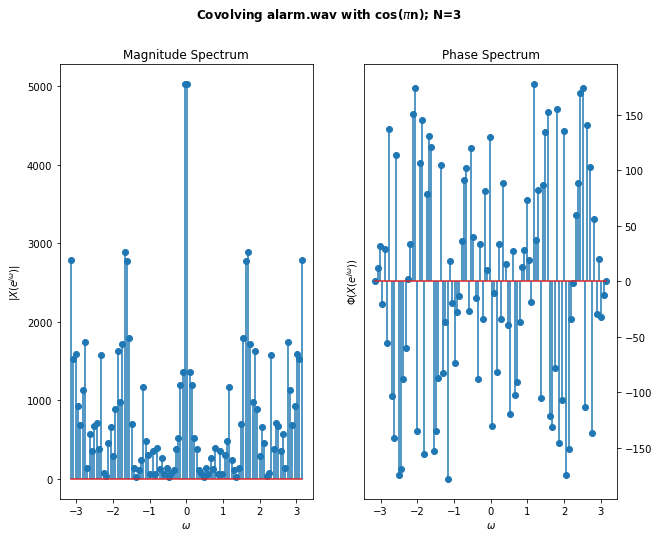

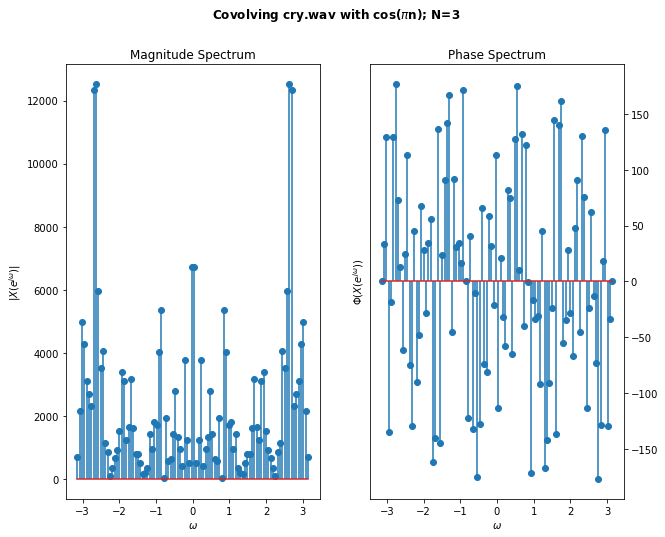

In [26]:
N=3
n1=np.linspace(-N,N,num=(2*N)+1)
h=np.cos(np.pi*n1)   
S=Audio_conv('alarm.wav','alarmi2.wav',h,n1) #applying convolution and creating new wav file
playsound('alarmi2.wav')
H=DTFT(S,w_0,np.linspace(-2*N,len(S)-(2*N)-1,num=len(S)), title='Covolving alarm.wav with cos($\pi$n); N=3')   #DTFT of new data
S=Audio_conv('cry.wav','cryi2.wav',h,n1)
playsound('cryi2.wav')                                        
H=DTFT(S,w_0,np.linspace(-2*N,len(S)-(2*N)-1,num=len(S)), title='Covolving cry.wav with cos($\pi$n); N=3')

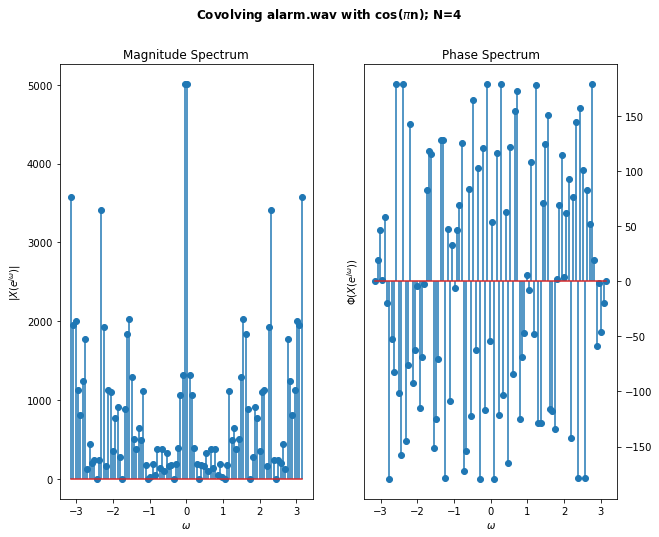

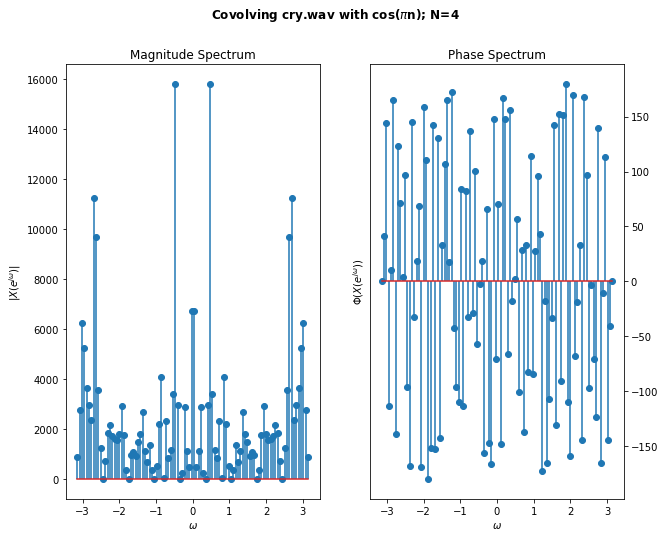

In [27]:
N=4
n1=np.linspace(-N,N,num=(2*N)+1)
h=np.cos(np.pi*n1)   
S=Audio_conv('alarm.wav','alarmi3.wav',h,n1) #applying convolution and creating new wav file
playsound('alarmi3.wav')
H=DTFT(S,w_0,np.linspace(-2*N,len(S)-(2*N)-1,num=len(S)), title='Covolving alarm.wav with cos($\pi$n); N=4')   #DTFT of new data
S=Audio_conv('cry.wav','cryi3.wav',h,n1)
playsound('cryi3.wav')                                        
H=DTFT(S,w_0,np.linspace(-2*N,len(S)-(2*N)-1,num=len(S)), title='Covolving cry.wav with cos($\pi$n); N=4')

## OBSERVATIONS:-
> For the this cos($\pi$n) system as N increses we observed that high frequency gain increases, middle frequency gain is slightly increased and meanwhile low frequency gain remains almost same.<br>
> Now as N increases we observe that peaks at the $\pi$ and -$\pi$ and even near 0 too.<br>
> Overall we an say that pitch has significantly increased.

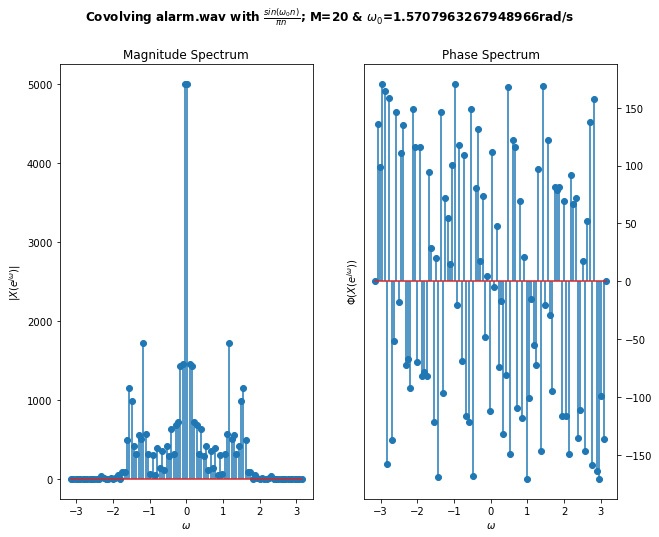

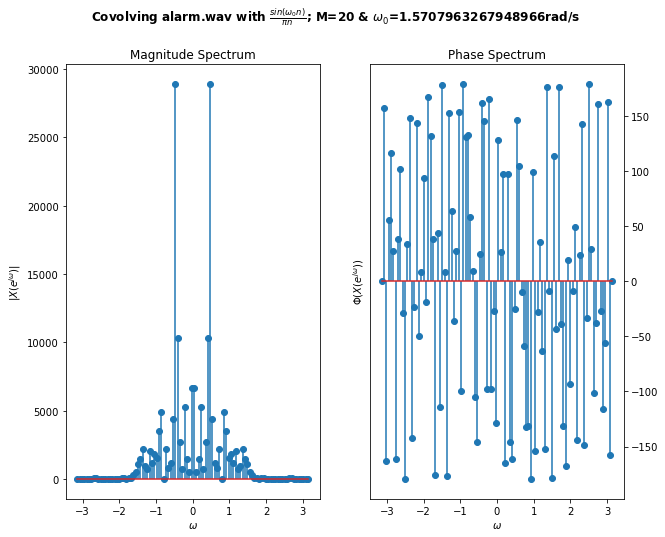

In [28]:
#2-j
M=20
w0=np.pi/2
n2=np.linspace(-1*M,M,num=(2*M)+1)
h = w0*np.sinc(w0*n2/np.pi)/np.pi 
S=Audio_conv('alarm.wav','alarmj1.wav',h,n2) #applying convolution and creating new wav file 
playsound('alarmj1.wav')
H=DTFT(S,w_0,np.linspace(-2*M,len(S)-(2*M)-1,num=len(S)), title='Covolving alarm.wav with $\\frac{sin({\omega}_0n)}{\pi n}$; M='+str(M)+' & ${\omega}_0$='+str(w0)+'rad/s')   #DTFT of new data
S=Audio_conv('cry.wav','cryj1.wav',h,n2)
playsound('cryj1.wav')
H=DTFT(S,w_0,np.linspace(-2*M,len(S)-(2*M)-1,num=len(S)), title='Covolving alarm.wav with $\\frac{sin({\omega}_0n)}{\pi n}$; M='+str(M)+' & ${\omega}_0$='+str(w0)+'rad/s')  

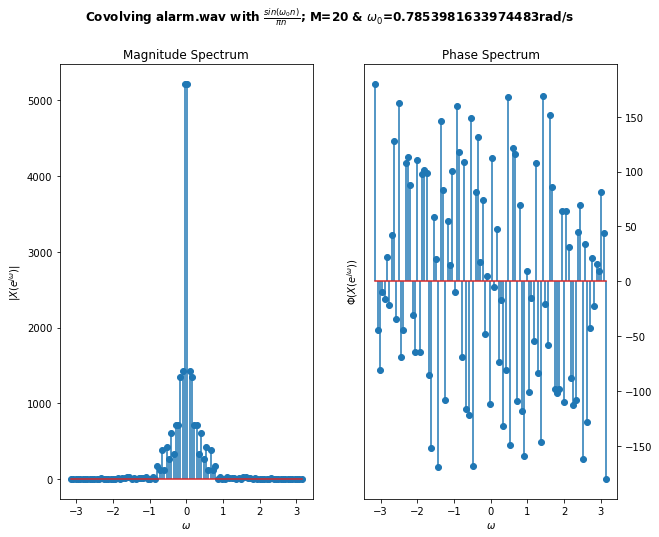

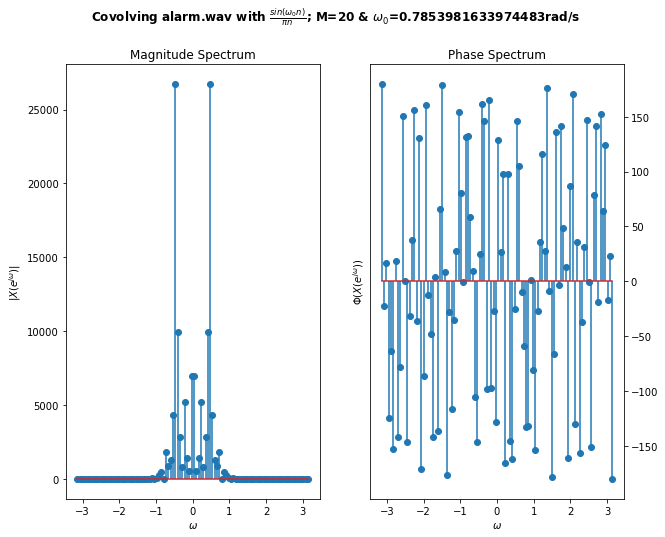

In [29]:
#2-j
M=20
w0=np.pi/4
n2=np.linspace(-1*M,M,num=(2*M)+1)
h = w0*np.sinc(w0*n2/np.pi)/np.pi 
S=Audio_conv('alarm.wav','alarmj1.wav',h,n2) #applying convolution and creating new wav file 
playsound('alarmj1.wav')
H=DTFT(S,w_0,np.linspace(-2*M,len(S)-(2*M)-1,num=len(S)), title='Covolving alarm.wav with $\\frac{sin({\omega}_0n)}{\pi n}$; M='+str(M)+' & ${\omega}_0$='+str(w0)+'rad/s')   #DTFT of new data
S=Audio_conv('cry.wav','cryj1.wav',h,n2)
playsound('cryj1.wav')
H=DTFT(S,w_0,np.linspace(-2*M,len(S)-(2*M)-1,num=len(S)), title='Covolving alarm.wav with $\\frac{sin({\omega}_0n)}{\pi n}$; M='+str(M)+' & ${\omega}_0$='+str(w0)+'rad/s')  

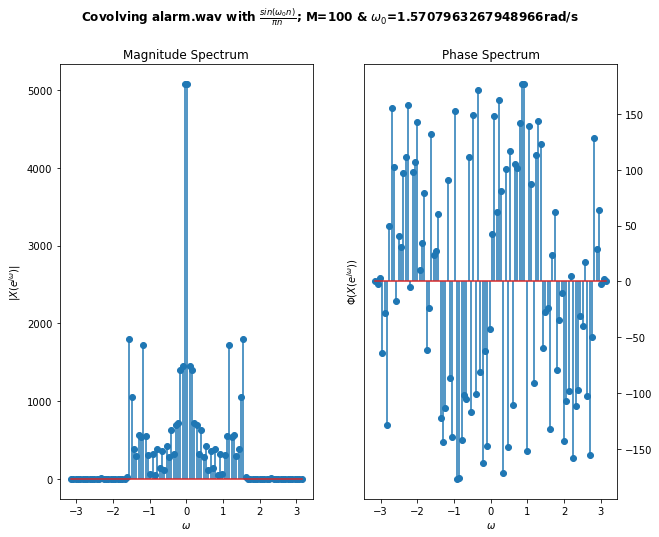

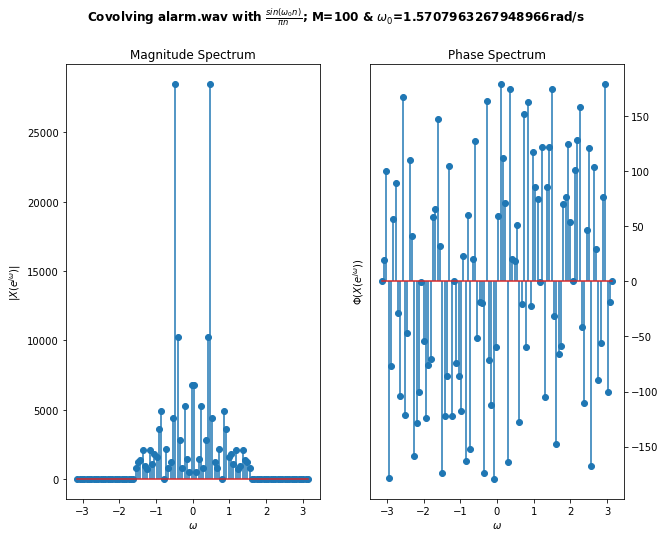

In [30]:
#2-j
M=100
w0=np.pi/2
n2=np.linspace(-1*M,M,num=(2*M)+1)
h = w0*np.sinc(w0*n2/np.pi)/np.pi 
S=Audio_conv('alarm.wav','alarmj1.wav',h,n2) #applying convolution and creating new wav file 
playsound('alarmj1.wav')
H=DTFT(S,w_0,np.linspace(-2*M,len(S)-(2*M)-1,num=len(S)), title='Covolving alarm.wav with $\\frac{sin({\omega}_0n)}{\pi n}$; M='+str(M)+' & ${\omega}_0$='+str(w0)+'rad/s')   #DTFT of new data
S=Audio_conv('cry.wav','cryj1.wav',h,n2)
playsound('cryj1.wav')
H=DTFT(S,w_0,np.linspace(-2*M,len(S)-(2*M)-1,num=len(S)), title='Covolving alarm.wav with $\\frac{sin({\omega}_0n)}{\pi n}$; M='+str(M)+' & ${\omega}_0$='+str(w0)+'rad/s')  

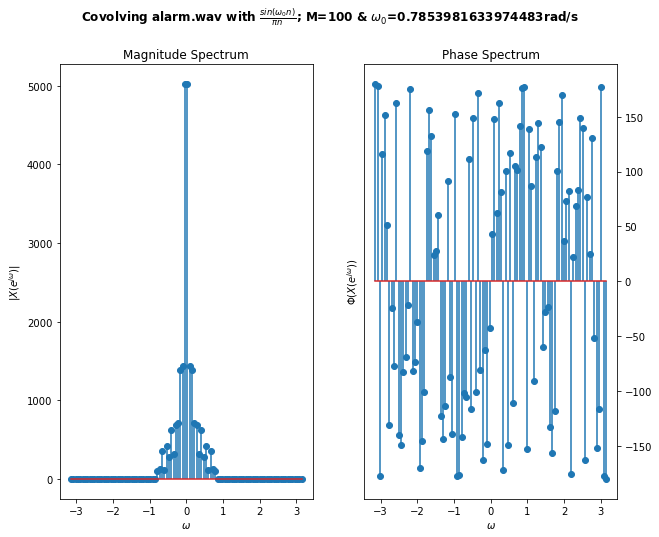

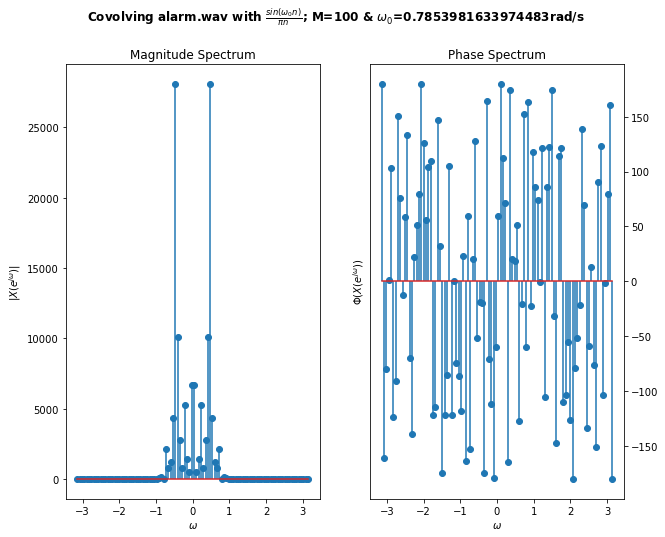

In [31]:
#2-j
M=100
w0=np.pi/4
n2=np.linspace(-1*M,M,num=(2*M)+1)
h = w0*np.sinc(w0*n2/np.pi)/np.pi 
S=Audio_conv('alarm.wav','alarmj1.wav',h,n2) #applying convolution and creating new wav file 
playsound('alarmj1.wav')
H=DTFT(S,w_0,np.linspace(-2*M,len(S)-(2*M)-1,num=len(S)), title='Covolving alarm.wav with $\\frac{sin({\omega}_0n)}{\pi n}$; M='+str(M)+' & ${\omega}_0$='+str(w0)+'rad/s')   #DTFT of new data
S=Audio_conv('cry.wav','cryj1.wav',h,n2)
playsound('cryj1.wav')
H=DTFT(S,w_0,np.linspace(-2*M,len(S)-(2*M)-1,num=len(S)), title='Covolving alarm.wav with $\\frac{sin({\omega}_0n)}{\pi n}$; M='+str(M)+' & ${\omega}_0$='+str(w0)+'rad/s')  

## OBSERVATIONS:-
> For the this sin($w_0$n)/$\pi$n system as $w_0$ increses we observed that bandwidth of rectangle increases and increase in M increases sharpness of rectangle.<br>
> We cannot hear any high frequency sounds in here.<br>
> Overall we an say that pitch has remained the same but only frequencies above w0 are not seen.